# Advanced Map Widget Usage

This guide covers more advanced uses for the map widget: see [using the map widget](../using-the-map-widget) for more information!

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Advanced-Map-Widget-Useage" data-toc-modified-id="Advanced-Map-Widget-Useage-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Advanced Map Widget Useage</a></span><ul class="toc-item"><li><span><a href="#Property-Updating" data-toc-modified-id="Property-Updating-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Property Updating</a></span></li></ul></li><li><span><a href="#Callbacks" data-toc-modified-id="Callbacks-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Callbacks</a></span></li><li><span><a href="#3D-Feature-Layers" data-toc-modified-id="3D-Feature-Layers-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3D Feature Layers</a></span></li><li><span><a href="#Taking-advantage-of-Autocasting" data-toc-modified-id="Taking-advantage-of-Autocasting-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Taking advantage of Autocasting</a></span><ul class="toc-item"><li><span><a href="#Export-to-HTML" data-toc-modified-id="Export-to-HTML-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Export to HTML</a></span></li></ul></li></ul></div>

## Property Updating

The map widget handles `zoom`, `tilt`, `heading`/`rotation`, `basemap`, `center`, `extent`, etc. features in an interesting and powerful way. Try running the below cells to gain insight into how these properties are updated:

In [42]:
def print_map_info(map):
    print("Widget Type =\t\t{}".format(type(map)))
    if not hasattr(map, "camera"):
        print("Zoom =\t\t{}\n".format(map.zoom))
    elif map.camera:
        print("Zoom =\t\t{}\n".format(map.zoom) + \
              "Tilt =\t\t{}\n".format(map.tilt) + \
              "Heading =\t{}".format(map.heading))
    else:
        raise Exception("Not supported argument")

The *mode* property from the previous MapView class has been removed as a property from the Map class, but it can be used when initializing a widget to differentiate a _Scene_ or _Map_ widget:

In [ ]:
from arcgis.gis import GIS

In [237]:
type(GIS().map("USA", mode="2D"))

arcgis.map.map_widget.Map

In [238]:
type(GIS().map("USA", mode="3D"))

arcgis.map.scene_widget.Scene


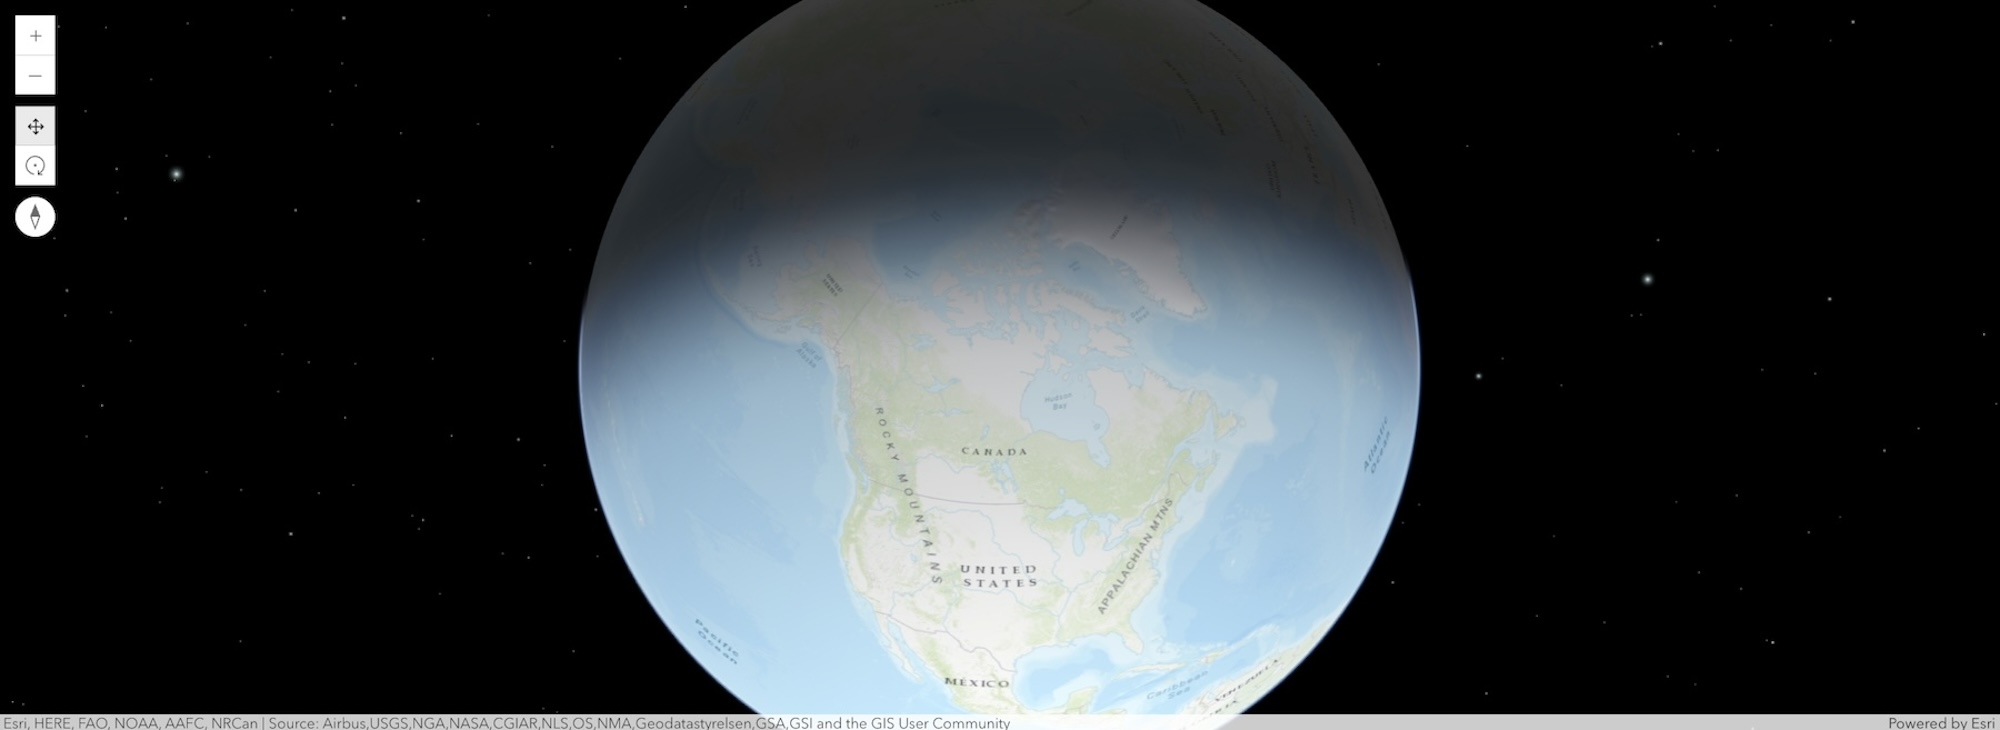

In [257]:
from arcgis.gis import GIS

usa_map = GIS().map("USA", mode="3D")
usa_map

Now, using your mouse, move the map to a new location, zoom in, modify the tilt and heading, etc. After you've moved the camera, run the below cells to change the zoom and print the current state of those properties:

In [240]:
usa_map.zoom = 2

In [241]:
print_map_info(usa_map)

Widget Type =		<class 'arcgis.map.scene_widget.Scene'>
Zoom =		2.0
Tilt =		0.09999878139707691
Heading =	0


The values of the widget properties will change with use of the various buttons in the map widget view! Experiment with printing out the values of `center`, `extent`, and any of the above properties. See the API reference for more information.

## 3D Feature Layers

Let's create a new map of Zion National Park in Utah. 3D mode will show the elevation of the many canyons, rides, and elevation changes. It will even cast shadows. Run the below cell and explore!

In [ ]:
gis = GIS(profile="your_online_profile")


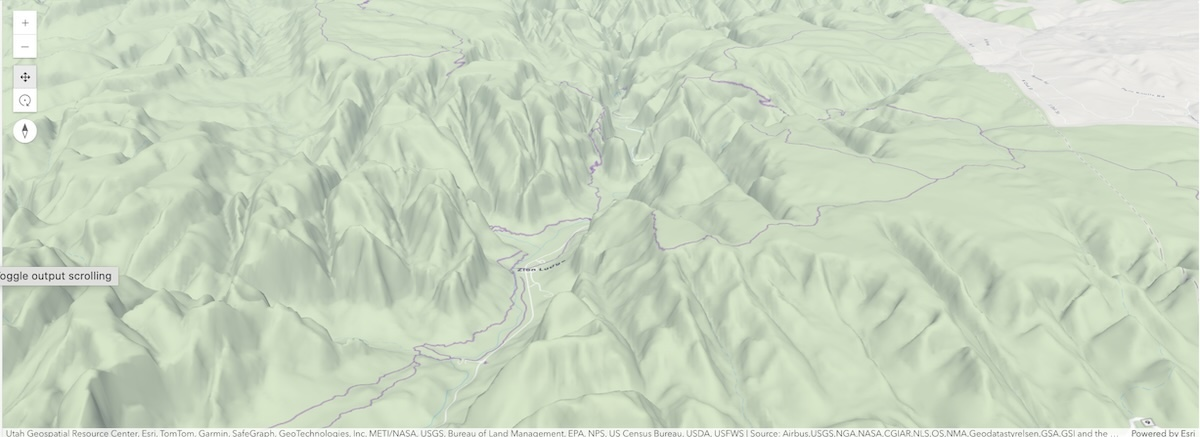

In [256]:
from arcgis.gis import GIS
zion_map = gis.map("Angel's Landing UT", mode="3D")
zion_map

Run each of these cells below individually to watch how the view changes.

In [249]:
zion_map.zoom = 14

In [250]:
zion_map.center = [37.2502, -112.9564]

In [251]:
zion_map.camera = {
    "position": {
        "x": -12573578.761488685,
        "y": 4461966.125736885,
        "z": 6300,
    },
    "tilt": 65,
    "heading": 360, 
}

You can also add Portal items and layers to the 3D map just like before. Run the below cell to add a layer of trails: notice how the trails follow the elevation changes of the land!

In [252]:
trails_layer = gis.content.get("881694a7049b419ebb8d271c0e6d7ddd").layers[0]
zion_map.content.add(trails_layer)

In [253]:
zion_map.camera = {
    "position": {
        "x": -12573578.761488685,
        "y": 4461966.125736885,
        "z": 6300,
    },
    "tilt": 65,
    "heading": 360, 
}

You can save your current work as a WebScene by calling map.save(). Run the following code to save your WebScene!


In [255]:
my_zion_webscene_item = zion_map.save(
    {"title" : "My Zion Park Web Scene",
     "snippet" : "What I made with the ArcGIS API for Python Scene widget!",
     "tags" : "zion, NPS, python"}
)

my_zion_webscene_item

<Item title:"My Zion Park Web Scene" type:Web Scene owner:arcgis_python>

## Rendering

The Python API also supports rendering symbols on the map wideget through defining properties. Once defined, the widget makes use of the Javascript API renderers. Try running the below code snippet to use a `SimpleRenderer` with a `LineSymbol3D` symbol. More on autocast renderers below.

You are only limitted in your visualization options by the Javascript API: you can specify any renderer and modify any properties of said renderer. To show how powerful this really is, let's use the SimpleRenderer's [visual variables](https://developers.arcgis.com/javascript/latest/api-reference/esri-renderers-SimpleRenderer.html#visualVariables) functionality. Run the below cell to see a standard Feature Layer about Hurricane tracks in 2D mode.

In [1]:
from arcgis.gis import GIS
from arcgis.features import FeatureLayer

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/john3092/opt/anaconda3/envs/geosaurus_dev_env/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [2]:
anon_gis = GIS()

In [3]:
hurricane_layer = FeatureLayer(
    url="https://sampleserver6.arcgisonline.com/arcgis/rest/services/Hurricanes/MapServer/0")

In [4]:
hurricane_map = anon_gis.map('Atlantic Ocean')

In [5]:
hurricane_map.content.add(hurricane_layer)
hurricane_map

Map(center=[3716583.6647425774, -4155920.0458218013], extent={'xmin': -8511072.484127043, 'ymin': -835007.2772…

In [6]:
hurricane_map.legend.enabled=True

You can represent this same information on a 3D map by specifying a SimpleRenderer using white spheres. Run the below cell, click on some points, and examine some fields:

In [7]:
from arcgis.map import Scene

In [8]:
hurricane_map_3D = Scene(location='Atlantic Ocean')

In [10]:
from arcgis.map import renderers, symbols

In [11]:
renderer = renderers.SimpleRenderer(
    symbol=symbols.SimpleMarkerSymbolEsriSMS(
        style="esriSMSCircle", color=[255, 0, 0, 1], size=20
    )
)

In [13]:
hurricane_map_3D.content.add(
    item=hurricane_layer,
    drawing_info = {
        "renderer": renderer
    }
)

ValidationError: 1 validation error for FeatureLayerArcGISFeatureLayer
layerDefinition.timeInfo.timeIntervalUnits
  Input should be 'esriTimeUnitsCenturies', 'esriTimeUnitsDays', 'esriTimeUnitsDecades', 'esriTimeUnitsHours', 'esriTimeUnitsMilliseconds', 'esriTimeUnitsMinutes', 'esriTimeUnitsMonths', 'esriTimeUnitsSeconds', 'esriTimeUnitsUnknown', 'esriTimeUnitsWeeks' or 'esriTimeUnitsYears' [type=enum, input_value=<TimeIntervalUnits.esri_t...ys: 'esriTimeUnitsDays'>, input_type=TimeIntervalUnits]

Now that we have the base set up, lets specify the `visualVariables` field to vary the color of each point for the changing `PRESSURE` field, and vary the size of each point for the changing `WINDSPEED` field. Run the below cell, then try modifying the options to see different results! Maybe try tuning the `"value"` fields to see different color and size variations.


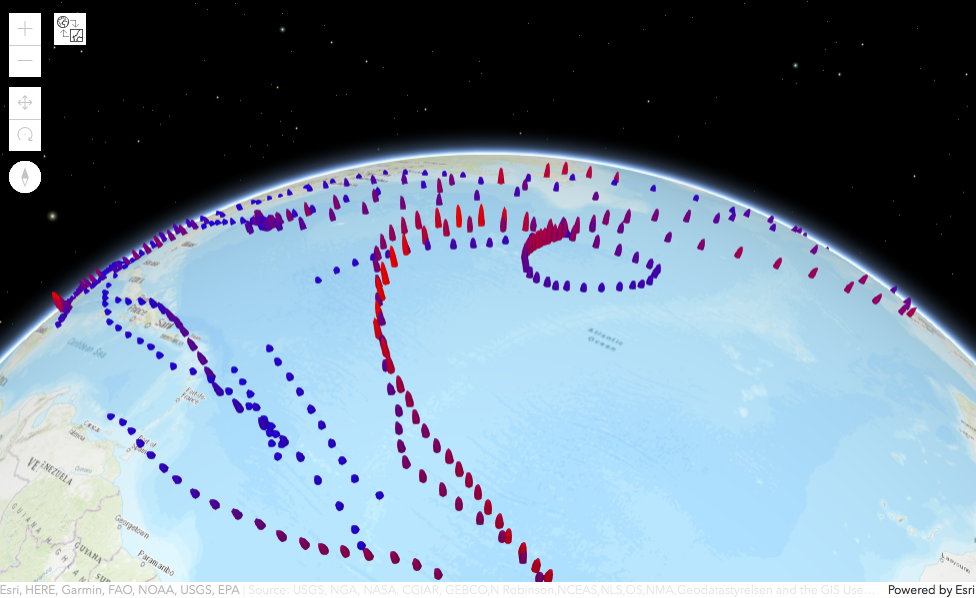

In [17]:
visual_var_map = anon_gis.map('Atlantic Ocean', mode="3D")

#Update the renderer to include visual variable information
renderer["visualVariables"] = [{ #JS configuration of visualVariables
    "type": "color",
    "field": "PRESSURE", 
    "stops": [
      { "value": 950, "color": "red" },
      { "value": 1020, "color": "blue" }
    ]
  }, {
    "type": "size",
    "field": "WINDSPEED",
    "stops": [
      { "value": 20, "size": 60000 },
      { "value": 150, "size": 500000 }
    ],
    "axis": "height"
  }, {
    "type": "size",
    "axis": "width-and-depth",
    "useSymbolValue": True
  }]
visual_var_map.content.add(hurricane_layer, renderer)
visual_var_map

## Export to HTML

Another new feature in 1.5.0 is the ability to export the current widget as a standalone HTML file. This added functionality provides a new workflow for creating standalone HTML maps that can be shared with anyone: all they need is a web browser!

The below cell will write the current widget to the file specified by a string path. Run the cell, find the file on your disk, and open it in your favorite web browser.

> Note: By default, only publically accesible layers will show on the exported HTML maps. You must specify credentials_prompt=True to allow users to authenticate to portal to view private layers. See [the API reference](https://developers.arcgis.com/python/api-reference/arcgis.widgets.html#arcgis.widgets.MapView.export_to_html) for more information.

In [ ]:
import os

file_dir = os.path.join(os.getcwd(), 'home')
if not os.path.isdir(file_dir):
    os.mkdir(file_dir)
    
file_path = os.path.join(file_dir, 'myHurricaneMap.html')

visual_var_map.export_to_html(file_path)
print("html saved as " + file_path) # On Windows, path can be 'C:\Users\Username\Documents\home\myHurricaneMap.html'